In [2]:
import numpy as np 
import pandas as pd


In [3]:
data=pd.read_csv('https://raw.githubusercontent.com/llohar/ML_Ass2_soln/main/Titanic%20Dataset%20-%20titanic_train.csv')

In [4]:
data.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

##**EDA**

In [6]:
data.shape

(891, 12)

In [7]:
data.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [8]:
data.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [ ]:
data.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [ ]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


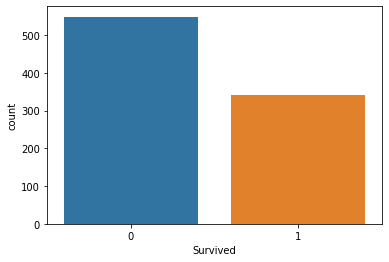

In [ ]:
sns.countplot(x='Survived',data=data)
plt.show()

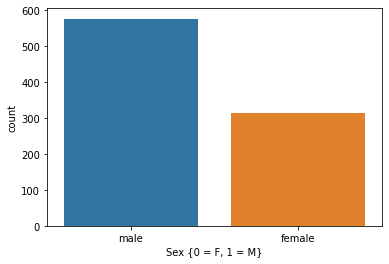

In [ ]:
sns.countplot(x='Sex', data=data)
plt.xlabel("Sex {0 = F, 1 = M}")
plt.show()

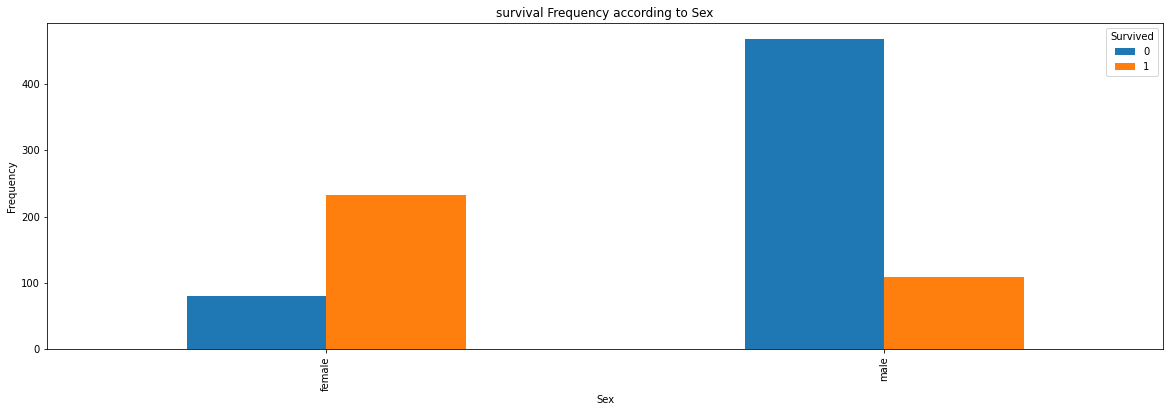

In [ ]:
pd.crosstab(data.Sex,data.Survived).plot(kind="bar",figsize=(20,6))
plt.title('survival Frequency according to Sex')
plt.xlabel('Sex')
plt.ylabel('Frequency')
plt.show()

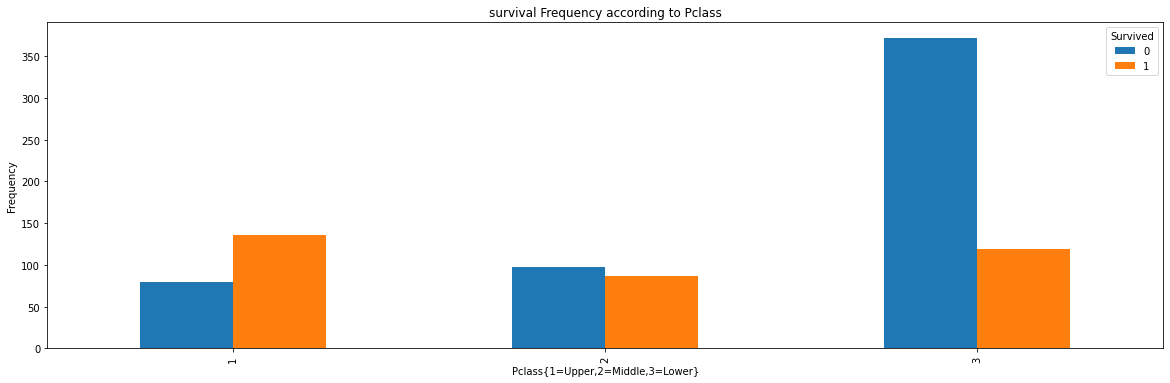

In [ ]:
pd.crosstab(data.Pclass,data.Survived).plot(kind="bar",figsize=(20,6))
plt.title('survival Frequency according to Pclass')
plt.xlabel('Pclass{1=Upper,2=Middle,3=Lower}')
plt.ylabel('Frequency')
plt.show()

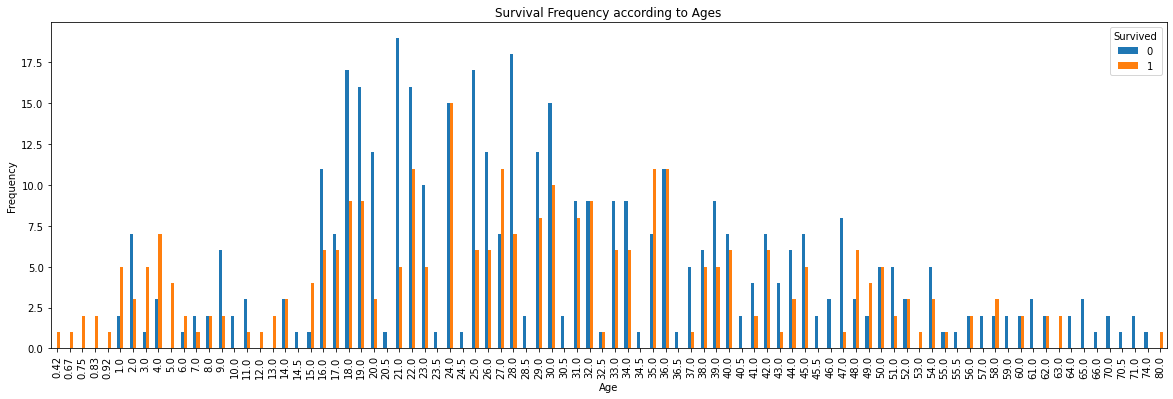

In [ ]:
pd.crosstab(data.Age,data.Survived).plot(kind="bar",figsize=(20,6))
plt.title('Survival Frequency according to Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

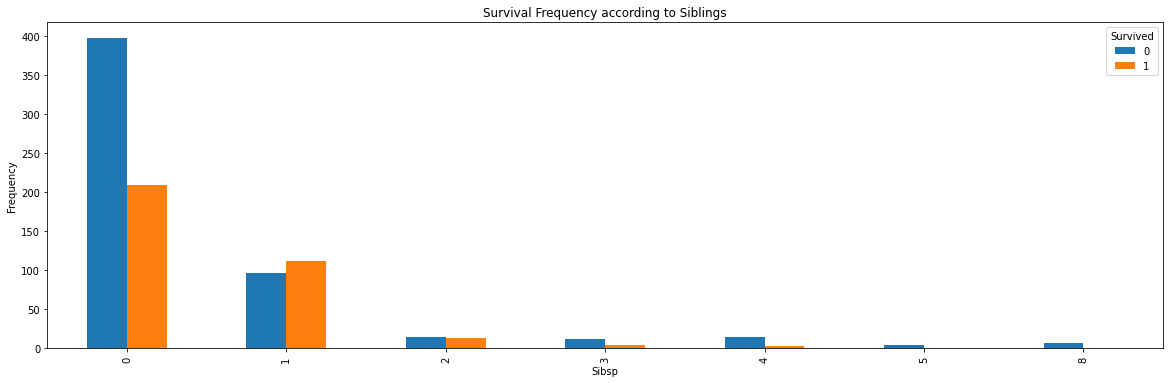

In [ ]:
pd.crosstab(data.SibSp,data.Survived).plot(kind="bar",figsize=(20,6))
plt.title('Survival Frequency according to Siblings')
plt.xlabel('Sibsp')
plt.ylabel('Frequency')
plt.show()

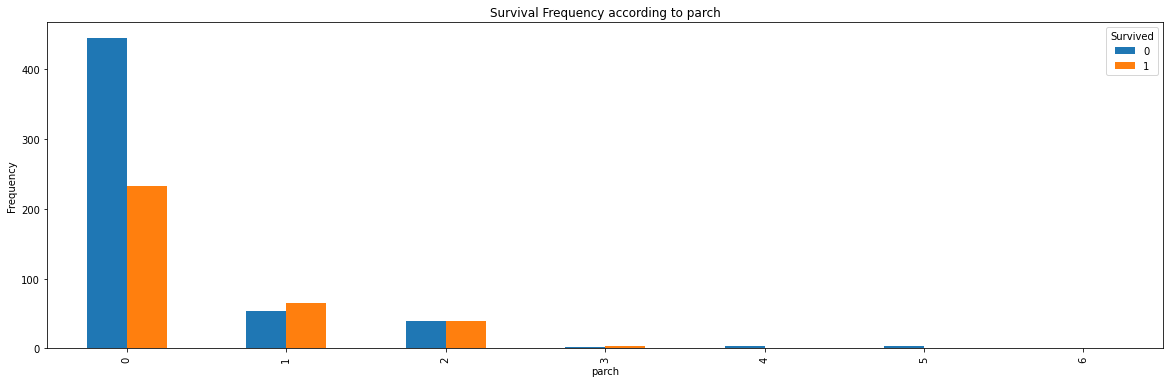

In [ ]:
pd.crosstab(data.Parch,data.Survived).plot(kind="bar",figsize=(20,6))
plt.title('Survival Frequency according to parch')
plt.xlabel('parch')
plt.ylabel('Frequency')
plt.show()

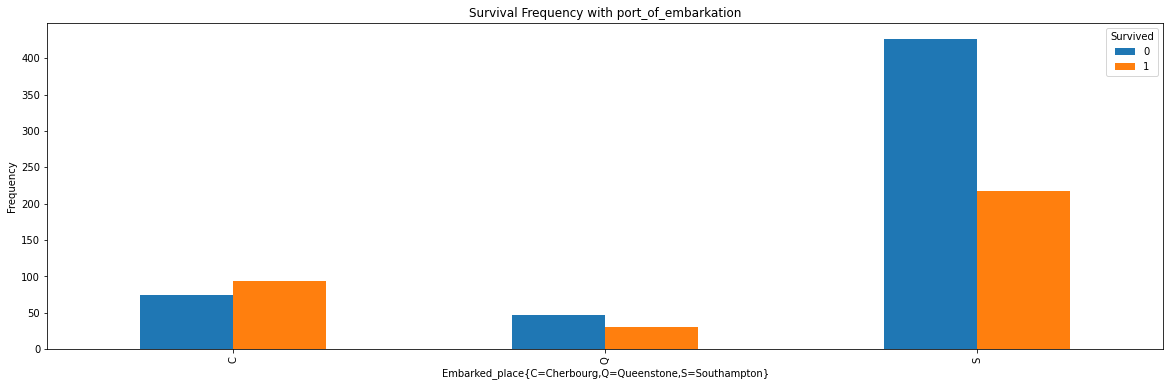

In [ ]:
pd.crosstab(data.Embarked,data.Survived).plot(kind="bar",figsize=(20,6))
plt.title('Survival Frequency with port_of_embarkation')
plt.xlabel('Embarked_place{C=Cherbourg,Q=Queenstone,S=Southampton}')
plt.ylabel('Frequency')
plt.show()

In [ ]:
####data['Fare_Category'] = pd.cut(data['Fare'], bins=[0,7.90,29,45,500], labels=['Low','Mid','High_Mid','High'])

In [ ]:
"""pd.crosstab(data.Fare_Category,data.Survived).plot(kind="bar",figsize=(20,6))
plt.title('Survival Frequency according to Fare')
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.show()"""

'pd.crosstab(data.Fare_Category,data.Survived).plot(kind="bar",figsize=(20,6))\nplt.title(\'Survival Frequency according to Fare\')\nplt.xlabel(\'Fare\')\nplt.ylabel(\'Frequency\')\nplt.show()'

{'boxes': [<matplotlib.lines.Line2D at 0x7ff5474e0550>],
 'caps': [<matplotlib.lines.Line2D at 0x7ff5474e8550>,
 'fliers': [<matplotlib.lines.Line2D at 0x7ff5474f1590>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7ff5474f1050>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7ff5474e0a90>,
  <matplotlib.lines.Line2D at 0x7ff5474e0fd0>]}

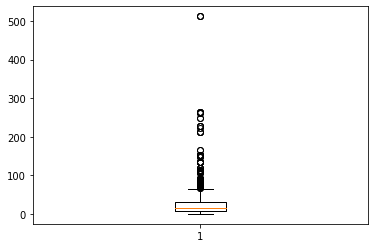

In [ ]:
plt.boxplot(data['Fare'])

Text(0.5, 1.0, 'Missing value heatmap')

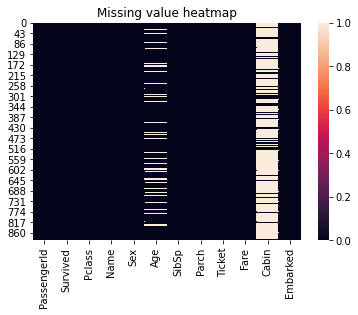

In [ ]:
data.isnull().sum()
sns.heatmap(data.isnull()).set_title('Missing value heatmap')


In [ ]:
data.isnull().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
data.Embarked.fillna(data.Embarked.mode()[0], inplace = True)

In [10]:
data.Cabin = data.Cabin.fillna('NA')

In [ ]:
#data['Salutation'] = data.Name.apply(lambda name: name.split(',')[1].split('.')[0].strip())
#data.Salutation.unique()

In [11]:
grp = data.groupby(['Sex', 'Pclass'])

In [12]:
grp.Age.apply(lambda x: x.fillna(x.mean()))
data.Age.fillna(data.Age.mean(),inplace=True)

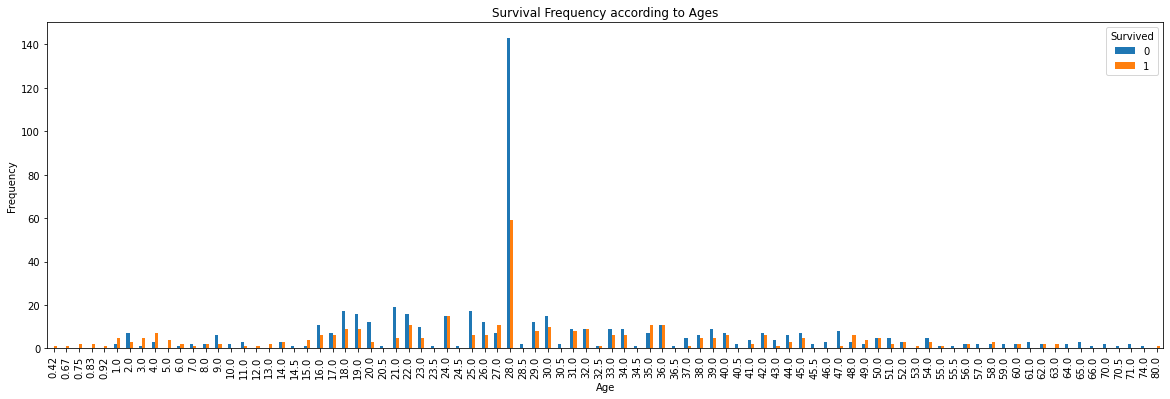

In [ ]:
pd.crosstab(data.Age,data.Survived).plot(kind="bar",figsize=(20,6))
plt.title('Survival Frequency according to Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

In [ ]:
data.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NA,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NA,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NA,S
5,6,0,3,"Moran, Mr. James",male,28.0,0,0,330877,8.4583,NA,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NA,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NA,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NA,C


In [13]:
data.drop(columns=['Ticket','Cabin'])

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,30.0000,C


##**Part(iv)**

In [ ]:
data.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          148
Embarked         3
dtype: int64

In [14]:
a = pd.get_dummies(data['Pclass'], prefix = "Pclass")
b = pd.get_dummies(data['Sex'], prefix = "Sex")
c = pd.get_dummies(data['SibSp'], prefix = "Sibsp")
d = pd.get_dummies(data['Embarked'], prefix = "Embarked")
e = pd.get_dummies(data['Parch'], prefix = "Parch")


In [ ]:
a,b

(     Pclass_1  Pclass_2  Pclass_3
 0           0         0         1
 1           1         0         0
 2           0         0         1
 3           1         0         0
 4           0         0         1
 ..        ...       ...       ...
 886         0         1         0
 887         1         0         0
 888         0         0         1
 889         1         0         0
 890         0         0         1
 
 [891 rows x 3 columns],      Sex_female  Sex_male
 0             0         1
 1             1         0
 2             1         0
 3             1         0
 4             0         1
 ..          ...       ...
 886           0         1
 887           1         0
 888           1         0
 889           0         1
 890           0         1
 
 [891 rows x 2 columns])

In [ ]:
c,d

(     Sibsp_0  Sibsp_1  Sibsp_2  Sibsp_3  Sibsp_4  Sibsp_5  Sibsp_8
 0          0        1        0        0        0        0        0
 1          0        1        0        0        0        0        0
 2          1        0        0        0        0        0        0
 3          0        1        0        0        0        0        0
 4          1        0        0        0        0        0        0
 ..       ...      ...      ...      ...      ...      ...      ...
 886        1        0        0        0        0        0        0
 887        1        0        0        0        0        0        0
 888        0        1        0        0        0        0        0
 889        1        0        0        0        0        0        0
 890        1        0        0        0        0        0        0
 
 [891 rows x 7 columns],      Embarked_C  Embarked_Q  Embarked_S
 0             0           0           1
 1             1           0           0
 2             0           0       

In [ ]:
e 

,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6
0,1,0,0,0,0,0,0
1,1,0,0,0,0,0,0
2,1,0,0,0,0,0,0
3,1,0,0,0,0,0,0
4,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...
886,1,0,0,0,0,0,0
887,1,0,0,0,0,0,0
888,0,0,1,0,0,0,0
889,1,0,0,0,0,0,0


In [15]:
frames = [data, a, b, c,d,e]
data = pd.concat(frames, axis = 1)
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Sibsp_0,Sibsp_1,Sibsp_2,Sibsp_3,Sibsp_4,Sibsp_5,Sibsp_8,Embarked_C,Embarked_Q,Embarked_S,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NA,S,0,0,1,0,1,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NA,S,0,0,1,1,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NA,S,0,0,1,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0


In [16]:
data = data.drop(columns = ['Pclass','Name','Sex','SibSp','Parch','Ticket','Cabin','Embarked'])
data.head()

,PassengerId,Survived,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Sibsp_0,Sibsp_1,Sibsp_2,Sibsp_3,Sibsp_4,Sibsp_5,Sibsp_8,Embarked_C,Embarked_Q,Embarked_S,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6
0,1,0,22.0,7.2500,0,0,1,0,1,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0
1,2,1,38.0,71.2833,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0
2,3,1,26.0,7.9250,0,0,1,1,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0
3,4,1,35.0,53.1000,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0
4,5,0,35.0,8.0500,0,0,1,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0


In [ ]:
data.columns.values

array(['PassengerId', 'Survived', 'Age', 'Fare', 'Pclass_1', 'Pclass_2',
       'Pclass_3', 'Sex_female', 'Sex_male', 'Sibsp_0', 'Sibsp_1',
       'Sibsp_2', 'Sibsp_3', 'Sibsp_4', 'Sibsp_5', 'Sibsp_8',
       'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Parch_0', 'Parch_1',
       'Parch_2', 'Parch_3', 'Parch_4', 'Parch_5', 'Parch_6'],
      dtype=object)

In [ ]:
data.shape

(891, 26)

In [ ]:
data.isnull().sum()

PassengerId    0
Survived       0
Age            0
Fare           0
Pclass_1       0
Pclass_2       0
Pclass_3       0
Sex_female     0
Sex_male       0
Sibsp_0        0
Sibsp_1        0
Sibsp_2        0
Sibsp_3        0
Sibsp_4        0
Sibsp_5        0
Sibsp_8        0
Embarked_C     0
Embarked_Q     0
Embarked_S     0
Parch_0        0
Parch_1        0
Parch_2        0
Parch_3        0
Parch_4        0
Parch_5        0
Parch_6        0
dtype: int64

In [17]:
y=data.Survived.values
x_data=data.drop(data['Survived'])



In [ ]:
x_data.head()

,PassengerId,Survived,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Sibsp_0,Sibsp_1,Sibsp_2,Sibsp_3,Sibsp_4,Sibsp_5,Sibsp_8,Embarked_C,Embarked_Q,Embarked_S,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6
2,3,1,26.0,7.9250,0,0,1,1,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0
3,4,1,35.0,53.1000,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0
4,5,0,35.0,8.0500,0,0,1,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0
5,6,0,28.0,8.4583,0,0,1,0,1,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0
6,7,0,54.0,51.8625,1,0,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0


In [18]:
# Normalize
x = (x_data - np.min(x_data)) / (np.max(x_data) - np.min(x_data)).values

In [19]:
x_data.shape,y.shape

((889, 26), (891,))

In [23]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.3,random_state=0)


ValueError: ignored

In [21]:
lr = LogisticRegression()
lr.fit(x_train,y_train)
acc = lr.score(x_test,y_test)*100

NameError: ignored

In [ ]:
print("Logistic Regression Accuracy is {0}%".format(round(acc,2)))

In [ ]:
predictions = lr.predict(x_test)

In [ ]:
predictions

In [ ]:
prediction_probabilities = lr.predict_proba(x_test)

In [ ]:
prediction_probabilities